In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import numpy as np
from itertools import product, izip
from scipy.spatial import KDTree

pointsXY1 = np.array(list(product(xrange(3), xrange(3))))
print pointsXY1
k1 = KDTree(pointsXY1)

pointsXY2 = np.array(list(product(np.arange(0.5, 3), np.arange(0.5, 3))))
print pointsXY2
k2 = KDTree(pointsXY2)


[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
[[ 0.5  0.5]
 [ 0.5  1.5]
 [ 0.5  2.5]
 [ 1.5  0.5]
 [ 1.5  1.5]
 [ 1.5  2.5]
 [ 2.5  0.5]
 [ 2.5  1.5]
 [ 2.5  2.5]]


In [17]:

# X, Y
from scipy.spatial import KDTree

distances, indices = k1.query((0, 0), k=2)
print pointsXY1[indices]
indices = k1.query_ball_point((0, 0), 1)
print pointsXY1[indices]

indexLists = k1.query_ball_tree(k2, 1)
for point, indices in izip(pointsXY1, indexLists):
    print '*** %s *** ' % point
    print pointsXY2[indices]
    
indexPairs = k1.query_pairs(1)
for index1, index2 in indexPairs:
    print pointsXY1[index1], pointsXY1[index2]

[[0 0]
 [0 1]]
[[0 0]
 [0 1]
 [1 0]]
*** [0 0] *** 
[[ 0.5  0.5]]
*** [0 1] *** 
[[ 0.5  0.5]
 [ 0.5  1.5]]
*** [0 2] *** 
[[ 0.5  1.5]
 [ 0.5  2.5]]
*** [1 0] *** 
[[ 0.5  0.5]
 [ 1.5  0.5]]
*** [1 1] *** 
[[ 0.5  0.5]
 [ 0.5  1.5]
 [ 1.5  0.5]
 [ 1.5  1.5]]
*** [1 2] *** 
[[ 0.5  1.5]
 [ 0.5  2.5]
 [ 1.5  1.5]
 [ 1.5  2.5]]
*** [2 0] *** 
[[ 1.5  0.5]
 [ 2.5  0.5]]
*** [2 1] *** 
[[ 1.5  0.5]
 [ 1.5  1.5]
 [ 2.5  0.5]
 [ 2.5  1.5]]
*** [2 2] *** 
[[ 1.5  1.5]
 [ 1.5  2.5]
 [ 2.5  1.5]
 [ 2.5  2.5]]
[0 0] [0 1]
[0 1] [0 2]
[1 1] [2 1]
[2 0] [2 1]
[1 1] [1 2]
[2 1] [2 2]
[0 1] [1 1]
[1 0] [2 0]
[0 0] [1 0]
[1 0] [1 1]
[0 2] [1 2]
[1 2] [2 2]


In [2]:
import geometryIO
import shapely
import shapely.geometry
#import pysal
import pylab as pl
from shapely.geometry import Point, LineString, Polygon

In [3]:
def plot(shapelyGeometries):
    'Plot shapelyGeometries'
    figure = pl.figure(num=None, figsize=(4, 4), dpi=180)
    axes = pl.axes()
    axes.set_aspect('equal', 'datalim')
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)
    draw(shapelyGeometries)
            
def draw(gs):
    'Draw shapelyGeometries'
    # Handle single and multiple geometries
    try:
        gs = iter(gs)
    except TypeError:
        gs = [gs]
    # For each shapelyGeometry,
    for g in gs:
        gType = g.geom_type
        if gType.startswith('Multi') or gType == 'GeometryCollection':
            draw(g.geoms)
        else:
            draw_(g)
            
def draw_(g):
    'Draw a shapelyGeometry; thanks to Sean Gilles'
    gType = g.geom_type
    if gType == 'Point':
        pl.plot(g.x, g.y, 'k,')
    elif gType == 'LineString':
        x, y = g.xy
        pl.plot(x, y, 'b-')
    elif gType == 'Polygon':
        x, y = g.exterior.xy
        pl.fill(x, y, color='#cccccc', aa=True) 
        pl.plot(x, y, color='#666666', aa=True, lw=1.0)
        for hole in g.interiors:
            x, y = hole.xy
            pl.fill(x, y, color='#ffffff', aa=True) 
            pl.plot(x, y, color='#999999', aa=True, lw=1.0)

TypeError: draw() takes no arguments (1 given)

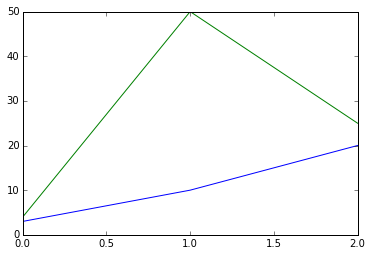

In [8]:
point1 = Point((6, 10))
lineString1 = LineString(((3, 4), (10, 50), (20, 25)))
polygon1 = Polygon(
    ((1, 1), (5, 1), (5, 5), (1, 5), (1, 1)),      # Shell
    [
        ((2, 2), (2, 3), (3, 3), (3, 2), (2, 2)),  # Hole
        ((3, 3), (3, 4), (4, 4), (4, 3), (3, 3)),  # Hole
    ]
)
plot(lineString1)
draw(polygon1)

In [5]:
from shapely import wkt, geometry
wktPoly = "POLYGON((0 0,4 0,4 4,0 4,0 0))"
poly = wkt.loads(wktPoly)
print poly.area


buf = poly.buffer(5.0)
print buf.area
#TM_WORLD_BORDERS-0.3.shx

16.0
174.413712264


In [8]:
import osgeo.ogr
shapefile = osgeo.ogr.Open("TM_WORLD_BORDERS-0.3.shp")

In [8]:
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher

shp_link = 'WGS84.shp'
shp = ps.open(shp_link)
from pysal.contrib.viz import mapping as viz
viz.plot_poly_lines(shp_link)

In [3]:
import networkx as nx

In [4]:
graph = nx.Graph()

graph.add_edge('台北101', '忠孝敦化', duration=5)
graph.add_edge('台北車站', '忠孝復興', duration=10)
graph.add_edge('忠孝復興', '忠孝敦化', duration=2)
graph.add_edge('忠孝敦化', '敦化南路二段', duration=10)

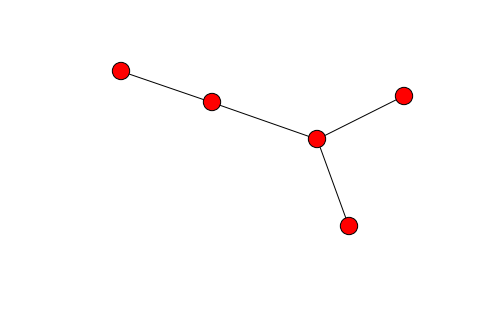

In [5]:
nx.draw(graph)

In [6]:
print [node for node, connectionCount in nx.degree(graph).iteritems() if connectionCount > 2][0]

忠孝敦化


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 0: ordinal not in range(128)

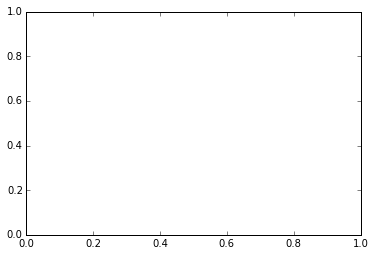

In [7]:
labels=nx.draw_networkx_labels(graph,pos=nx.spring_layout(graph))
nx.draw(graph)

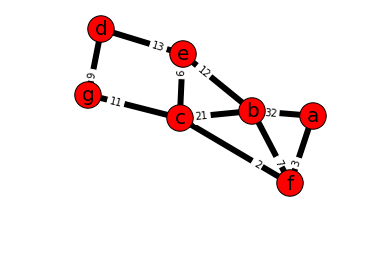

In [24]:
import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=32)
G.add_edge('a','f',weight=3)
G.add_edge('b','c',weight=21)
G.add_edge('b','e',weight=12)
G.add_edge('b','f',weight=7)
G.add_edge('c','e',weight=6)
G.add_edge('c','g',weight=11)
G.add_edge('c','f',weight=2)
G.add_edge('d','e',weight=13)
G.add_edge('d','g',weight=9)

# positions for all nodes
pos=nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos, width=6)

# edge label
nx.draw_networkx_edge_labels(G,pos, 
    {
        ("a","b"):"32",("a","f"):"3", ("b","c"):"21", ("b","e"):"12",("b","f"):"7", ("c","e"):"6",\
        ("c","g"):"11", ("d","e"):"13", ("d","g"):"9", ("c","f"):"2"
    },
    label_pos=0.3
)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [25]:
nx.dijkstra_path(G, 'a', 'g', weight='weight')

['a', 'f', 'c', 'g']

In [26]:
nx.dijkstra_path_length(G, 'a', 'g', weight='weight')

16

In [27]:
nx.astar_path(G, 'a', 'g', weight='weight')

['a', 'f', 'c', 'g']

In [28]:
[node for node, connectionCount in nx.degree(G).iteritems() if connectionCount > 2]

['c', 'b', 'e', 'f']

In [29]:
from networkx.algorithms import minimum_spanning_tree
optimized_graph = minimum_spanning_tree(G)

In [31]:
from networkx.algorithms import dfs_edges
list(dfs_edges(optimized_graph))

[('a', 'f'), ('f', 'c'), ('c', 'e'), ('c', 'g'), ('g', 'd'), ('f', 'b')]